## Let's check the firing rate between awake ripple and sleep ripple. This is for searching the evidenece of the adaptation strength difference

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext lab_black

In [1]:
from src.load_data import load_MU_firing_rate, load_MU_firing_rate_sleep
import pandas as pd

In [2]:
epoch_key = ("Cor", 1, 4)
data_awake = load_MU_firing_rate(epoch_key)

In [7]:
# get the mean firing_rate for each ripple_times in data["multiunit_firing_rate"]
# create a dataframe for saving firing_rate
firing_rate_df = pd.DataFrame(columns=["start_time", "end_time", "firing_rate"])

for i in data_awake["ripple_times"].index:
    # get the ripple time
    ripple_time = data_awake["ripple_times"].iloc[i - 1]
    start_time = ripple_time.loc["start_time"]
    end_time = ripple_time.loc["end_time"]

    # get the mean firing rate for the ripple time
    firing_rate = data_awake["multiunit_firing_rate"].loc[start_time:end_time].mean()
    # to float
    firing_rate = firing_rate[0]
    firing_rate_df = firing_rate_df.append(
        {"start_time": start_time, "end_time": end_time, "firing_rate": firing_rate},
        ignore_index=True,
    )

,start_time,end_time,firing_rate
0,0 days 01:38:19.871500011,0 days 01:38:20.018166667,153.143452
1,0 days 01:23:15.537566626,0 days 01:23:15.694899947,146.583183
2,0 days 01:23:17.552899810,0 days 01:23:17.678899801,92.156461
3,0 days 01:23:20.866232900,0 days 01:23:20.960899559,48.188403
4,0 days 01:23:22.500899446,0 days 01:23:22.563566108,45.005225
...,...,...,...
298,0 days 01:37:42.156169455,0 days 01:37:42.218169451,74.751217
299,0 days 01:37:43.016836059,0 days 01:37:43.125502717,129.190686
300,0 days 01:37:43.884835995,0 days 01:37:43.985502654,109.275566
301,0 days 01:38:08.028834216,0 days 01:38:08.083500879,58.844755


In [3]:
epoch_key = ("Cor", 1, 5)
data_sleep = load_MU_firing_rate_sleep(epoch_key)

In [9]:
data_awake['multiunit'].shape

<xarray.DataArray (time: 452517, features: 4, tetrodes: 11)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,  37.69373153],
        [         nan,          nan,          nan, ...,          nan,
                  nan,  48.51759756],
        [         nan,          nan,          nan, ...,          nan,
                  nan,  45.58316462],
        [         nan,          nan,          nan, ...,          nan,
                  nan,  41.9804472 ]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
...
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
          75.24065016,          nan],
        [         nan,          nan,          nan, ...,          nan,
          29.72987417,          nan],
        [         nan,          nan,          nan, ...,          nan,
          43.9382869 ,          nan],
        [         nan,          nan,          nan, ...,          nan,
         103.66435569,          nan]],

       [[         nan,          nan,          nan, ...,  50.13917932,
                  nan,  46.26289445],
        [         nan,          nan,          nan, ...,  21.25081577,
                  nan,  53.80972787],
        [         nan,          nan,          nan, ...,  27.06997038,
                  nan,  48.35673365],
        [         nan,          nan,          nan, ...,  35.49643299,
                  nan,  43.6352141 ]]])
Coordinates:
  * time      (time) timedelta64[ns] 01:23:14.986900 ... 01:38:20.018900
  * features  (features) <U17 'channel_1_max' ... 'channel_4_max'
Dimensions without coordinates: tetrodes

In [8]:
data_sleep['multiunit'].shape

(610714, 4, 11)

## check if the meaning firing rate is different between awake and sleep ripples

In [24]:
# load all pkl under /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/awake_sleep_firingrate_in_ripples
import os
import pickle
import numpy as np

path = "/home/zilong/Desktop/replay_trajectory_paper/Processed-Data/awake_sleep_firingrate_in_ripples"
files = os.listdir(path)
MeanFR = []
for file in files:
    with open(os.path.join(path, file), "rb") as f:
        data = pickle.load(f)
        awake = data[0]
        sleep = data[1]
        # get the mean fring rate from awake['firing_rate'], sleep['firing_rate']
        fr_awake = awake["firing_rate"].mean()
        fr_sleep = sleep["firing_rate"].mean()
        MeanFR.append([fr_awake, fr_sleep])

MeanFR = np.array(MeanFR)

1.6295557943119345e-11


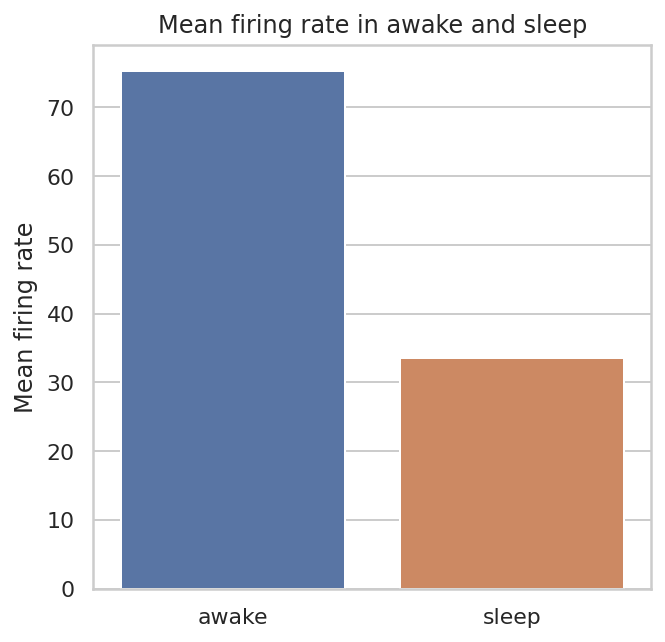

In [30]:
# remove nan
MeanFR = MeanFR[~np.isnan(MeanFR).any(axis=1)]

# pairwise wilcoxon test report the p-value
from scipy.stats import wilcoxon

u, p = wilcoxon(MeanFR[:, 0], MeanFR[:, 1])
print(p)

# bar plot for mean firing rate in awake and sleep
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.barplot(x=["awake", "sleep"], y=MeanFR.mean(axis=0), ci=95)
plt.ylabel("Mean firing rate")
plt.title("Mean firing rate in awake and sleep")
plt.show()

(60, 2)